In [1]:
def num_after_point(x):
    s = str(x)
    if not '.' in s:
        return 0
    return len(s) - s.index('.') - 1


decimal_places = 100
beta_step_size = 0.001
beta_lower = 0.001
beta_upper= 3
beta_expansion = 12
beta_digits_after_decimal = num_after_point(beta_step_size)
# print(beta_digits_after_decimal)
k_limit = 10
Decimal_expansion = 1
initial_x = 1
final_x = 3
x_step_size = 0.1
x_digits_after_decimal =  num_after_point(x_step_size)
alpha_root = 2

In [2]:
from decimal import *
from sympy import *
import numpy as np
import math
getcontext().prec = decimal_places


def derivative():
    x = Symbol('x')    
    f = x**2 -4*x +4
    f_prime = f.diff(x)
#     print(f_prime)

    f = lambdify(x, f)
    f1 = lambdify(x, f_prime)
    return f1

def double_derivative(f1):
    x = Symbol('x')
    f2 = f1.diff(x)
    return lambdify(x, f2)

def f2(x):
    return Decimal(x)**2 -4*Decimal(x) + 4

def coc(co):
    l = len(co)
    if l < 4:
        return None
#     print("coc = ",co)
#     print(l)
    a = Decimal(Decimal(co[l-1] - co[l-2]).copy_abs())
    b = Decimal(Decimal(co[l-2] - co[l-3]).copy_abs())
    c = Decimal(Decimal(co[l-2] - co[l-3]).copy_abs())
    d = Decimal(Decimal(co[l-3] - co[l-4]).copy_abs())
#     print(co[k_limit-1])
#     print(co[k_limit-2])
#     print(co[k_limit-3])
#     print(co[k_limit-4])
#     print(a,type(a))
#     print(b,type(b))
#     print(c,type(c))
#     print(d,type(d))
#     print(type(a/b))
    try:
        e = Decimal(a)/Decimal(b)
    #     print(e)
        e = Decimal(math.log(e))
        f = Decimal(math.log(c/d))
        x = e/f
        return x
#     print(f)
    except:
        return None

    

def effi(xn,coc):
    a = Decimal(len(xn))
    b= Decimal(coc)
    return a**(1/b)

def error(xn1,t):
    e1 = []
    for i in xn1:
        e2 = []
        for j in xn1[i]:
#             print(i,j)
            if t == 1:
                error = abs(j - float(Decimal(alpha_root)))
            else:
                error = abs(j - Decimal(alpha_root))
#             print(error)
            e2.append(error)
        e1.append(e2)
    return e1

def print_coc_beta_k_effi(xn1,cn,eff):
    print("kth\t beta\t coc ")
#     print("kth\t beta\t eff ")
    for i in xn1:
#         print(len(xn1[i]),i,eff[i])
        print(len(xn1[i]),i,cn[i])
        print("eff = ",eff[i],end ="\n\n")
        
    

def print_coc_beta_xk1_error(xn1,en,co,t): # print all iterations according to beta
    k,l = 0,0
    for i in xn1:
        if t==1:
            print("coc = ",co[i])
        print("Beta \t xk+1 \t error")
        
        for j in xn1[i]:        
            print(i,j,en[k][l])
            l+=1
        print()
        k+=1
        l=0

    
def print_k_beta_xk1_error(xn1,en): # arrange accoding to ascending order or "K"
    k = 0
    print("k\tBeta\txk+1\terror")
    for n in range(k_limit):  
        for i in xn1:
    #         print(n,k)
    #         print(en[k][n])
            if n <len(en[k]):
                if en[k][n] < 10**(-Decimal_expansion):
                    print(n+1,i,xn1[i][n], en[k][n])
            k+=1
        k=0
    
def beta_optimised(xn1,en):
    k = 0
    for n in range(k_limit):
        x,b,z = [],[],[]
        for i in xn1:
    #         print(n,k)
#             print(k,n,len(en[k]))
#             print(en[k][n])
            if en[k]:
                if en[k][n] < 10**(-Decimal_expansion):
                    x.append(en[k][n])
                    b.append(i)
                    z.append(n+1)
    #                     print(n+1,i,xn1[i][n], en[k][n])        
            k+=1
        
        if len(x) ==1:
#             print(b[0],z[0])
            return b[0],z[0]
        elif len(x) > 1:
#             print(b[x.index(min(x))],z[0])
            return b[x.index(min(x))],z[0]
#         else:
#             print("In ",n+1," iteration no ")
#             return None
    
        k=0
#     print("Error: ",x)
    return None,None

def iterative1(bl,bu,bss):    
    u = ("%.17f" % bss).rstrip('0').rstrip('.')
    beta_digits_after_decimal = num_after_point(u)
    f1 = derivative()
    def y_k(x,b):
        return Decimal(x) - (Decimal(f2(Decimal(x))) / (Decimal(f1(float(x))) + Decimal(b)*Decimal(f2(Decimal(x)))))

    def x_k1(yk,x):
        return Decimal(yk) - (Decimal(f2(Decimal(yk)))/Decimal(f1(float(x))))

    yn = []
    def hypothesis(x,b):  
        a,y1 =[],[]
        try:
            yk =  y_k(x,b)        
            x1 = x_k1(yk,x)
        except:
            return a
        a.append(x1)
        y1.append(yk)
        i = 0
        while i<k_limit-1:
            try:
                yk = y_k(x1,b)       
                x2 = x_k1(yk,x1)
                if abs(x2 - Decimal(alpha_root)) <= 10**(-Decimal_expansion):
                    a.append(x2)
                    y1.append(yk)
                    break
            except:
                break
            a.append(x2)
            y1.append(yk)
    #         print(yk,x1,x2)
            x1 = x2
            i+=1
        yn.append(y1)
        return a
#     print(a)
#     print(len(a))
    xn1,cn,eff = {},{},{}

    i =bl
    while i <= bu:
#         print(round(i,beta_digits_after_decimal),beta_digits_after_decimal,bss)        
        xn1[round(i,beta_digits_after_decimal)] = hypothesis(initial_x,round(i,beta_digits_after_decimal))
#         print(xn1[round(i,beta_digits_after_decimal)])
#         for j in xn1[round(i,beta_digits_after_decimal)]:
#             print(j)
        cn[round(i,beta_digits_after_decimal)] = coc(xn1[round(i,beta_digits_after_decimal)])
        if cn[round(i,beta_digits_after_decimal)] == None:
            eff[round(i,beta_digits_after_decimal)] = None
        else:
            eff[round(i,beta_digits_after_decimal)] = effi(xn1[round(i,beta_digits_after_decimal)],cn[round(i,beta_digits_after_decimal)])
        i= i+bss
    
    return xn1,cn,eff  


def iterative2(bl,bu,bss):
    u = ("%.17f" % bss).rstrip('0').rstrip('.')
    beta_digits_after_decimal = num_after_point(u)
    f1 = derivative()
    def y_k(x,b):
        try:
            z = (Decimal(f1(float(x))))            
        except:
#             print(type(x))
            t =round(float(x),0)
            p = "{0:.2f}".format(x)
#             print(t,p)
            z = (Decimal(f1(t)))
            return Decimal(x) - (Decimal(f2(Decimal(x))) / z)
        else:
            
            return Decimal(x) - (Decimal(f2(Decimal(x))) / z)
        return Decimal(x) - (Decimal(f2(Decimal(x))) / (Decimal(f1(float(x)))))         
    def z_k(x,yk,b):
        return Decimal(yk) - (Decimal(f2(Decimal(yk)))/(Decimal(b) *(Decimal(f1(float(x))))))
        
    def x_k1(yk,x,zk,b):
        return Decimal(zk) + Decimal(b)*Decimal(f2(Decimal(zk))) - ((2-Decimal(b)-(1/Decimal(b))) *Decimal(f2(yk)))/ (Decimal(f1(float(x))))

    yn,zn = [],[]
    def hypothesis(x,b):  
        a,y1,z1 =[],[],[]
        try:
            yk =  float(y_k(x,b))
            zk = float(z_k(x,yk,b))
            x1 = float(x_k1(yk,x,zk,b))
        except:
            return a
        
        a.append(x1)
        y1.append(yk)
        z1.append(zk)
        i = 0
        while i<k_limit-1:
#             print(i+1,x1,yk,zk)
            try:
                yk = float(y_k(x1,b))
                zk = float(z_k(x1,yk,b))
                x2 = float(x_k1(yk,x1,zk,b))
                if abs(x2 - float(Decimal(alpha_root))) <= 10**(-Decimal_expansion):
                    a.append(x2)
                    y1.append(yk)
                    z1.append(zk)
                    break
            except:
                break
            a.append(x2)
            y1.append(yk)
            z1.append(zk)
    #         print(yk,x1,x2)
            x1 = x2
            i+=1
        zn.append(z1)
        yn.append(y1)
        return a
    #     print(a)
    
    
    xn1,cn,eff = {},{},{}
#     xn1[round(beta_lower,beta_digits_after_decimal)] = hypothesis(initial_x,round(beta_lower,beta_digits_after_decimal))
#     return xn1
    
    i =bl
    while i <= bu:
        try:
            xn1[round(i,beta_digits_after_decimal)] = hypothesis(initial_x,round(i,beta_digits_after_decimal))
        except:
            i= i+bss
            continue
        cn[round(i,beta_digits_after_decimal)] = coc(xn1[round(i,beta_digits_after_decimal)])
        if cn[round(i,beta_digits_after_decimal)] == None:
            eff[round(i,beta_digits_after_decimal)] = None
        else:
            eff[round(i,beta_digits_after_decimal)] = effi(xn1[round(i,beta_digits_after_decimal)],cn[round(i,beta_digits_after_decimal)])
        
        
#         print(xn1)
#         print()
        i= i+bss
    
    return xn1,cn,eff



def iterative3(bl,bu,bss):
    u = ("%.17f" % bss).rstrip('0').rstrip('.')
    beta_digits_after_decimal = num_after_point(u)
    def w_k(x,b):
        return Decimal(x) - Decimal(b)*(Decimal(f2(Decimal(x))))
    def y_k(x,b,wk):
        return Decimal(x) - (Decimal(b)*(Decimal(f2(Decimal(x)))**2) / (Decimal(f2(Decimal(wk))) - Decimal(f2(Decimal(x))))) 

    def x_k1(yk,x,b,wk):        
        return Decimal(x) - (Decimal(b)*(Decimal(f2(Decimal(x)))**3)/((Decimal(f2(Decimal(wk))) - Decimal(f2(Decimal(x))))*
                                                                      (Decimal(f2(Decimal(x))) - Decimal(f2(Decimal(yk))) - 
                                                                       (Decimal(f2(Decimal(yk)))**2)/Decimal(f2(Decimal(wk))))))

    yn,wn = [],[]
    def hypothesis(x,b):  
        a,y1,w1 =[],[],[]
        try:
            wk = w_k(x,b)
            yk =  y_k(x,b,wk)
    #         print(wk)        
            x1 = x_k1(yk,x,b,wk)
        except:
            return a
        a.append(x1)
        y1.append(yk)
        w1.append(wk)
        i,x2 = 0,0
        while i<k_limit-1:
            try:
                wk = w_k(x1,b)
                yk = y_k(x1,b,wk)
    #             print(i+1,yk,x1,x2,wk)            
                x2 = x_k1(yk,x1,b,wk)
            
                if abs(x2 - Decimal(alpha_root)) <= 10**(-Decimal_expansion):
                    a.append(x2)
                    y1.append(yk)
                    w1.append(wk)
                    break
            except:
                break
            w1.append(wk)
            a.append(x2)
            y1.append(yk)
#             print(i+1,yk,x1,x2,wk)
            x1 = x2
            i+=1
        yn.append(y1)
        wn.append(w1)
        return a
    #     print(a)
    
    xn1,cn,eff = {},{},{}
    i =bl
    while i <= bu:
        xn1[round(i,beta_digits_after_decimal)] = hypothesis(initial_x,round(i,beta_digits_after_decimal))
        cn[round(i,beta_digits_after_decimal)] = coc(xn1[round(i,beta_digits_after_decimal)])
        if cn[round(i,beta_digits_after_decimal)] == None:
            eff[round(i,beta_digits_after_decimal)] = None
        else:
            eff[round(i,beta_digits_after_decimal)] = effi(xn1[round(i,beta_digits_after_decimal)],cn[round(i,beta_digits_after_decimal)])
        
        i= i+bss
    
    return xn1,cn,eff    






def main1(t):
    global beta_lower,beta_upper,beta_step_size,initial_x
    bl = beta_lower
    bu = beta_upper
    bss = beta_step_size
    p = initial_x
    if t==1:       
#         print(initial_x)
        b1,c = 0.0,0
        while True:
#             print(beta_lower,beta_upper,beta_step_size)
            xn1,cn1,eff1 = iterative1(beta_lower,beta_upper,beta_step_size)
#             print(xn1)
            en1 = error(xn1,0)
            s = num_after_point(b1)
            b1,k1 = beta_optimised(xn1,en1)
#             print(b1,k1)
            q = num_after_point(b1)
            if q == s:
                c+=1
            if c==5:
                break
            if q < beta_expansion:
                beta_lower = round(b1 - 10**(-q),q)
                beta_upper = round(b1 + 10**(-q),q)
                beta_step_size = round(beta_step_size * (0.1),17)                 
#                 print(beta_lower,beta_upper,beta_step_size)
            else:
                break
        
        beta_lower,beta_upper,beta_step_size = bl,bu,bss
        
        initial_x = p
        b2,c = 0.0,0
        while True:
#             print(beta_lower,beta_upper,beta_step_size)
            xn2,cn2,eff2 = iterative2(beta_lower,beta_upper,beta_step_size)
#             print(xn1)
            en2 = error(xn2,1)
            s = num_after_point(b2)
            b2,k2 = beta_optimised(xn2,en2)
#             print(b2,k2)            
            q = num_after_point(b2)
            if q == s:
                c+=1
            if c == 5:
                break
            
#             print(q,beta_expansion)
            if q < beta_expansion-1:
                beta_lower = round(b2 - 10**(-q),q)
                beta_upper = round(b2 + 10**(-q),q)
                beta_step_size = round(beta_step_size * (0.1),17)                 
#                 print(beta_lower,beta_upper,beta_step_size)
            else:
                break
            
        initial_x = p    
        beta_lower,beta_upper,beta_step_size = bl,bu,bss    
        b4,c = 0.0,0
        while True:
#             print(beta_lower,beta_upper,beta_step_size)
            xn4,cn4,eff4 = iterative3(beta_lower,beta_upper,beta_step_size)

            en4 = error(xn4,0)
            s = num_after_point(b4)
            b4,k4 = beta_optimised(xn4,en4)
#             print(b4,k4)            
            q = num_after_point(b4)
            if q == s:
                c+=1
            if c == 5:
                break
            
#             print(q,beta_expansion)
            if q < beta_expansion-1:
                beta_lower = round(b4 - 10**(-q),q)
                beta_upper = round(b4 + 10**(-q),q)
                beta_step_size = round(beta_step_size * (0.1),17)              
#                 print(beta_lower,beta_upper,beta_step_size)
            else:
                break   
        
        
#         [b1,k1,cn1[b1],eff1[b1]],[b2,k2,cn2[b2],eff2[b2]],[b4,k4,cn4[b4],eff4[b4]]
        s = []
        if b1 == None:
            s.append([None]*4)
        else:
            s.append([b1,k1,cn1[b1],eff1[b1]])
        if b2 == None:
            s.append([None]*4)
        else:
            s.append([b2,k2,cn2[b2],eff2[b2]])
        if b4 == None:
            s.append([None]*4)
        else:
            s.append([b4,k4,cn4[b4],eff4[b4]])
        return s
            
        
        
        
        
        
    xn1,cn1,eff1 = iterative1(bl,bu,bss)
    xn2,cn2,eff2 = iterative2(bl,bu,bss)
    xn4,cn4,eff4 = iterative3(bl,bu,bss)


    en1 = error(xn1,0)    
    en2 = error(xn2,1)
    en4 = error(xn4,0)    



#     print_coc_beta_xk1_error(xn1,en1,cn1,1)
#     print_coc_beta_xk1_error(xn2,en2,cn2,0)
#     print_coc_beta_xk1_error(xn4,en4,cn4,1)

#     print_k_beta_xk1_error(xn1,en1)
#     print_k_beta_xk1_error(xn2,en2)
#     print_k_beta_xk1_error(xn4,en4)

#     print_coc_beta_k_effi(xn1,cn1,eff1)
#     print_coc_beta_k_effi(xn2,cn2,eff2)
#     print_coc_beta_k_effi(xn4,cn4,eff4)



    b1,k1 = beta_optimised(xn1,en1)
    b2,k2 = beta_optimised(xn2,en2)
    b4,k4 = beta_optimised(xn4,en4)
    
    
    s = []
    if b1 == None:
        s.append([None]*4)
    else:
        s.append([b1,k1,cn1[b1],eff1[b1]])
    if b2 == None:
        s.append([None]*4)
    else:
        s.append([b2,k2,cn2[b2],eff2[b2]])
    if b4 == None:
        s.append([None]*4)
    else:
        s.append([b4,k4,cn4[b4],eff4[b4]])
    return s
    

#     [b1,k1,cn1[b1],eff1[b1]],[b2,k2,cn2[b2],eff2[b2]],[b4,k4,cn4[b4],eff4[b4]]
#     return [b2,k2,cn2[b2],eff2[b2]]
#     return [b1,k1,cn1[b1],eff1[b1]],[b2,k2,cn2[b2],eff2[b2]],[b4,k4,cn4[b4],eff4[b4]]
#     print("\n\nBeta_optimized = ",beta_optimised())
    
    


    
if __name__ == "__main__":
    
#     a = main1(0)
#     print("Model 1: ",a[0])
#     print("Model 2: ",a[1])
#     print("Model 3: ",a[2])


    global beta_lower,beta_upper,beta_step_size,initial_x
    bl = beta_lower
    bu = beta_upper
    bss = beta_step_size
    a,x,m1y,m2y,m3y  =[],[],[],[],[]
    i= round(initial_x,x_digits_after_decimal)
    while i <=final_x+10**-x_digits_after_decimal:
    #     a1,b1,d1 =[],[],[]
        initial_x = round(i,x_digits_after_decimal)
        beta_lower,beta_upper,beta_step_size = bl,bu,bss
#         print(initial_x)
    #     d1.append(initial_x)
#         a.append(initial_x)
        a = main1(0)
        x.append(initial_x)
        m1y.append(a[0][0])
        m2y.append(a[1][0])
        m3y.append(a[2][0])
#         b.append(c)
#         print("\n\nFor x = ",initial_x," Beta_optimized: \n",a[0],a[1])
        print("\n\nFor x = ",initial_x," Beta_optimized: \nModel 1:",a[0],"\nModel 2:",a[1],"\nModel 3:",a[2])    
        i+=x_step_size



For x =  1  Beta_optimized: 
Model 1: [1.0, 1, None, None] 
Model 2: [2.958, 1, None, None] 
Model 3: [3.0, 10, Decimal('0.9106748253572078311098938693186785385567534056302932474065884696595570880698327193071204970620535245'), Decimal('12.53391642997678371204135824222035579201895590989696502991168035848685288981924088852740709015775980')]


For x =  1.1  Beta_optimized: 
Model 1: [1.111, 1, None, None] 
Model 2: [0.039, 1, None, None] 
Model 3: [3.0, 10, Decimal('0.9129605781900858769416378140867899571946162150131410774819028975835422645416276820247213319038847686'), Decimal('12.45482262018873228631969437090137576370526423905008327124375530268312571704889635450991865831614869')]


For x =  1.2  Beta_optimized: 
Model 1: [1.25, 1, None, None] 
Model 2: [0.036, 1, None, None] 
Model 3: [3.0, 10, Decimal('0.9155500611277760816516006157840463734149286589384458312908817675594925467113089340253930899648587845'), Decimal('12.366293917945213239093994921346063907582367941479554401578308410442

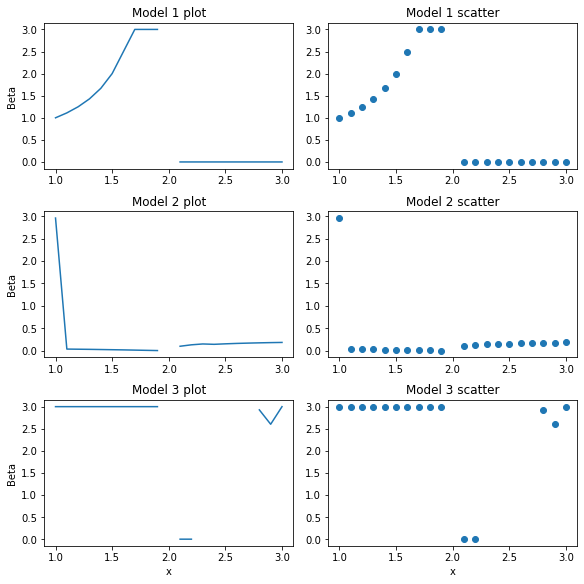

In [3]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3, 2,figsize=(8,8),constrained_layout = True)
axarr[0, 0].plot(x, m1y)
axarr[0, 0].set_title('Model 1 plot')

axarr[0, 1].scatter(x, m1y)
axarr[0, 1].set_title('Model 1 scatter')
axarr[1, 0].plot(x, m2y)
axarr[1, 0].set_title('Model 2 plot')
axarr[1, 1].scatter(x, m2y)
axarr[1, 1].set_title('Model 2 scatter')
axarr[2, 0].plot(x, m3y)
axarr[2, 0].set_title('Model 3 plot')
axarr[2, 1].scatter(x, m3y)
axarr[2, 1].set_title('Model 3 scatter')


plt.setp(axarr[-1, :], xlabel='x')
plt.setp(axarr[:, 0], ylabel='Beta')

plt.show()
